In [1]:
from ddpm import DDPM

In [2]:
ddpm_class = DDPM(100, 64)

In [3]:
ddpm_class.T

100

In [4]:
ddpm_class.timesteps

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [5]:
ddpm_class.beta

tensor([0.0000, 0.0101, 0.0202, 0.0303, 0.0404, 0.0505, 0.0606, 0.0707, 0.0808,
        0.0909, 0.1010, 0.1111, 0.1212, 0.1313, 0.1414, 0.1515, 0.1616, 0.1717,
        0.1818, 0.1919, 0.2020, 0.2121, 0.2222, 0.2323, 0.2424, 0.2525, 0.2626,
        0.2727, 0.2828, 0.2929, 0.3030, 0.3131, 0.3232, 0.3333, 0.3434, 0.3535,
        0.3636, 0.3737, 0.3838, 0.3939, 0.4040, 0.4141, 0.4242, 0.4343, 0.4444,
        0.4545, 0.4646, 0.4747, 0.4848, 0.4949, 0.5051, 0.5152, 0.5253, 0.5354,
        0.5455, 0.5556, 0.5657, 0.5758, 0.5859, 0.5960, 0.6061, 0.6162, 0.6263,
        0.6364, 0.6465, 0.6566, 0.6667, 0.6768, 0.6869, 0.6970, 0.7071, 0.7172,
        0.7273, 0.7374, 0.7475, 0.7576, 0.7677, 0.7778, 0.7879, 0.7980, 0.8081,
        0.8182, 0.8283, 0.8384, 0.8485, 0.8586, 0.8687, 0.8788, 0.8889, 0.8990,
        0.9091, 0.9192, 0.9293, 0.9394, 0.9495, 0.9596, 0.9697, 0.9798, 0.9899,
        1.0000])

In [6]:
ddpm_class.alpha_bar

tensor([1.0000e+00, 9.8990e-01, 9.6990e-01, 9.4051e-01, 9.0251e-01, 8.5693e-01,
        8.0499e-01, 7.4807e-01, 6.8762e-01, 6.2511e-01, 5.6197e-01, 4.9953e-01,
        4.3898e-01, 3.8134e-01, 3.2741e-01, 2.7780e-01, 2.3290e-01, 1.9291e-01,
        1.5784e-01, 1.2754e-01, 1.0178e-01, 8.0189e-02, 6.2369e-02, 4.7879e-02,
        3.6272e-02, 2.7113e-02, 1.9992e-02, 1.4540e-02, 1.0427e-02, 7.3729e-03,
        5.1387e-03, 3.5296e-03, 2.3887e-03, 1.5925e-03, 1.0456e-03, 6.7593e-04,
        4.3014e-04, 2.6938e-04, 1.6598e-04, 1.0059e-04, 5.9950e-05, 3.5122e-05,
        2.0222e-05, 1.1439e-05, 6.3548e-06, 3.4663e-06, 1.8557e-06, 9.7470e-07,
        5.0212e-07, 2.5359e-07, 1.2552e-07, 6.0856e-08, 2.8891e-08, 1.3424e-08,
        6.1019e-09, 2.7120e-09, 1.1779e-09, 4.9973e-10, 2.0696e-10, 8.3619e-11,
        3.2941e-11, 1.2644e-11, 4.7255e-12, 1.7184e-12, 6.0751e-13, 2.0864e-13,
        6.9546e-14, 2.2480e-14, 7.0391e-15, 2.1331e-15, 6.2483e-16, 1.7672e-16,
        4.8196e-17, 1.2658e-17, 3.1964e-

In [36]:
from model import UpBlock
import torch
from torch import nn

In [70]:
block = upblk(6, 3)

In [71]:
x = torch.randn(1, 3, 32, 32)

In [73]:
block(x, x).shape

torch.Size([1, 6, 32, 32])


torch.Size([1, 3, 64, 64])

In [54]:
torch.cat((x, x), dim=1).shape

torch.Size([1, 12, 32, 32])

In [66]:
class upblk(torch.nn.Module):
    def __init__(self, in_channels, out_channels):
        super(upblk, self).__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.up_sample = nn.ConvTranspose2d(out_channels, out_channels, kernel_size=2, stride=2)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        print(x.shape)
        x = self.conv_block(x)
        x = self.up_sample(x)
        return x

In [3]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [8]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [9]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [12]:
from trainer import Trainer
from ddpm import DDPM

In [15]:
trainer = Trainer(DDPM(100, 28), trainloader)

In [19]:
t, alpha_bar, epsilon = trainer.get_batch_data(10, 1)

In [22]:
epsilon.shape

torch.Size([10, 3, 28, 28])

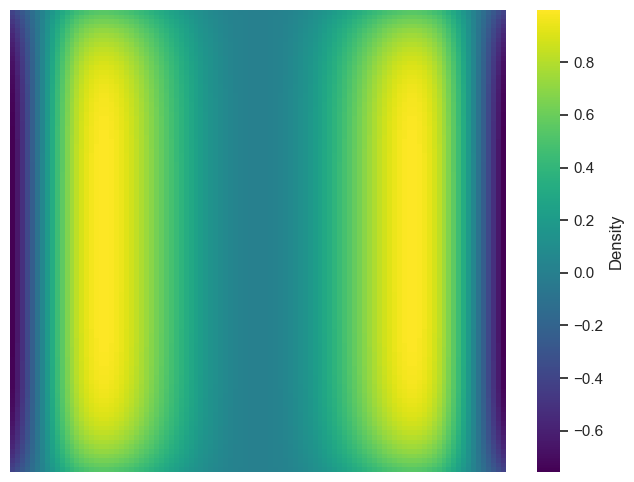

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create synthetic data for a curvy random shape
np.random.seed(0)
x = np.random.uniform(-2, 2, 1000)
y = np.random.uniform(-1, 1, 1000)

# Create a grid
x_grid = np.linspace(-2, 2, 100)
y_grid = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Create a random density function for demonstration (enclosed curvy shape)
density = np.sin(X**2) * np.cos(Y**3)

# Set a white background and create a contour plot
sns.set(style="white")
plt.figure(figsize=(8, 6))
cmap = "viridis"  # Choose a colormap
contour = sns.heatmap(density, cmap=cmap, cbar=True, xticklabels=False, yticklabels=False)

# Add a colorbar
cbar = contour.collections[0].colorbar
cbar.set_label('Density')

# Show the plot
plt.show()


C:\Users\Zakaria\AppData\Local\Temp\ipykernel_32400\3677891725.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df.sepal_width, y=df.sepal_length, cmap="Reds", shade=True, bw_adjust=0.5, ax=ax)


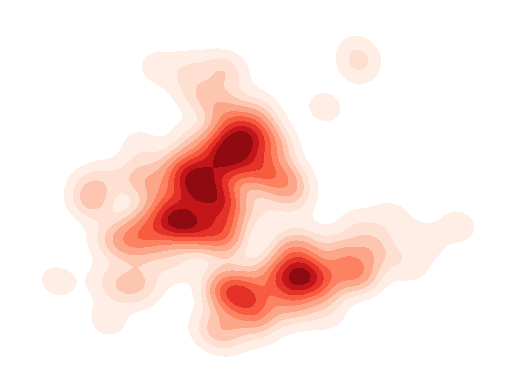

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = sns.load_dataset('iris')

# Create a figure and axis with no background, no axes, and no labels
fig, ax = plt.subplots()
fig.patch.set_alpha(0)  # Set the figure background to be transparent
ax.set_facecolor('none')  # Set the axes background to be transparent
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks([])  # Hide y-axis ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Create a 2D density plot with seaborn
sns.kdeplot(x=df.sepal_width, y=df.sepal_length, cmap="Reds", shade=True, bw_adjust=0.5, ax=ax)

# Show the plot
plt.show()


C:\Users\Zakaria\AppData\Local\Temp\ipykernel_32400\1510745543.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=titanic.age, y=titanic.fare, cmap="Reds", shade=True, bw_adjust=0.5, ax=ax)


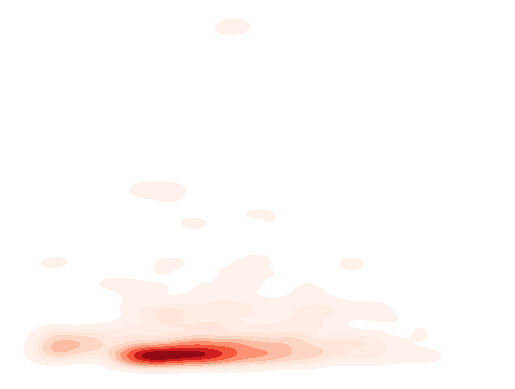

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Create a figure and axis with no background, no axes, and no labels
fig, ax = plt.subplots()
fig.patch.set_alpha(0)  # Set the figure background to be transparent
ax.set_facecolor('none')  # Set the axes background to be transparent
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks([])  # Hide y-axis ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Create a 2D density plot with seaborn for age and fare columns
sns.kdeplot(x=titanic.age, y=titanic.fare, cmap="Reds", shade=True, bw_adjust=0.5, ax=ax)

# Show the plot
plt.show()


In [18]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


C:\Users\Zakaria\AppData\Local\Temp\ipykernel_32400\1194651097.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=wine_df['alcohol'], y=wine_df['flavanoids'], cmap="Reds", shade=True, bw_adjust=0.5, ax=ax)


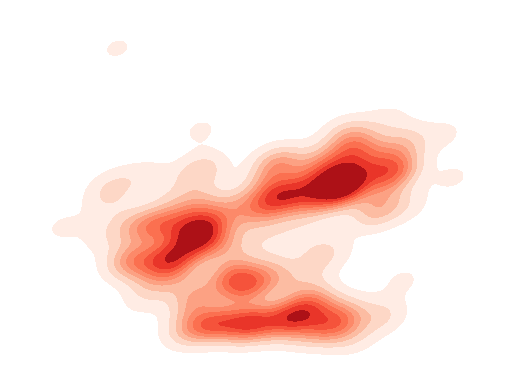

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load the Wine dataset from scikit-learn
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame

# Create a figure and axis with no background, no axes, and no labels
fig, ax = plt.subplots()
fig.patch.set_alpha(0)  # Set the figure background to be transparent
ax.set_facecolor('none')  # Set the axes background to be transparent
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks([])  # Hide y-axis ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Create a 2D density plot with seaborn for 'alcohol' and 'flavanoids' columns
sns.kdeplot(x=wine_df['alcohol'], y=wine_df['flavanoids'], cmap="Reds", shade=True, bw_adjust=0.5, ax=ax)

# Show the plot
plt.show()


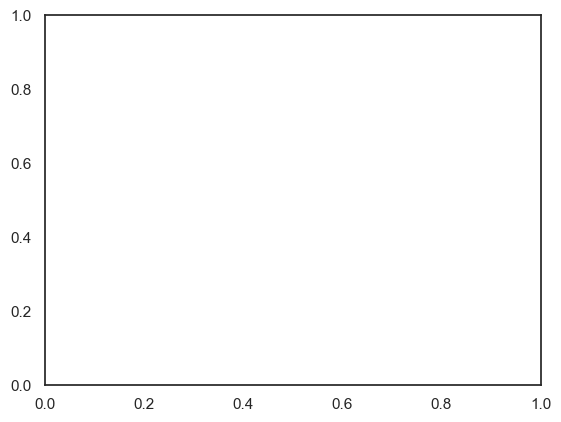

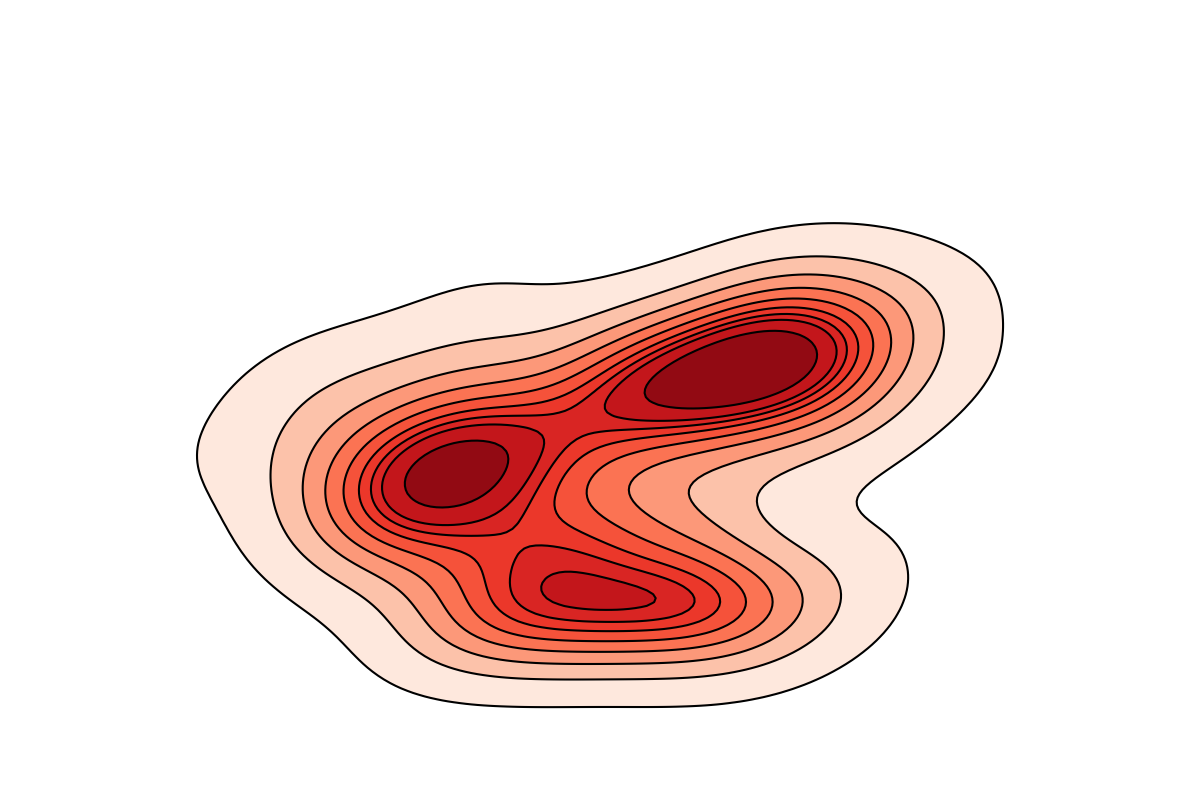

In [42]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
wine_data = load_wine(as_frame=True)
wine_df = wine_data.frame
 
fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15, 10))  # Set the figure size to 10 inches wide and 6 inches high
fig.patch.set_alpha(0)  # Set the figure background to be transparent
ax.set_facecolor('none')  # Set the axes background to be transparent
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks([])  # Hide y-axis ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Basic 2D density plot
sns.kdeplot(x=wine_df['alcohol'], y=wine_df['flavanoids'], color='black', fill=False)
sns.kdeplot(x=wine_df['alcohol'], y=wine_df['flavanoids'], cmap="Reds", fill=True)
plt.show()


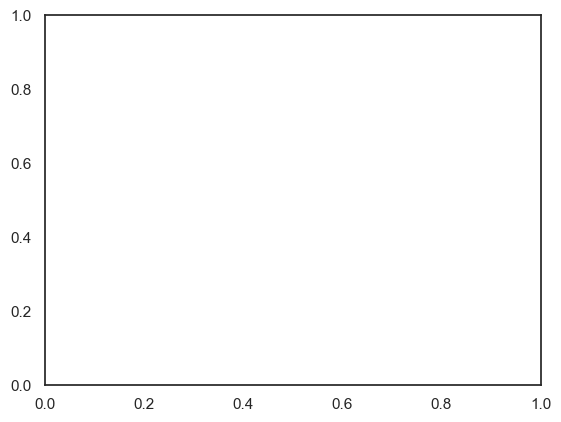

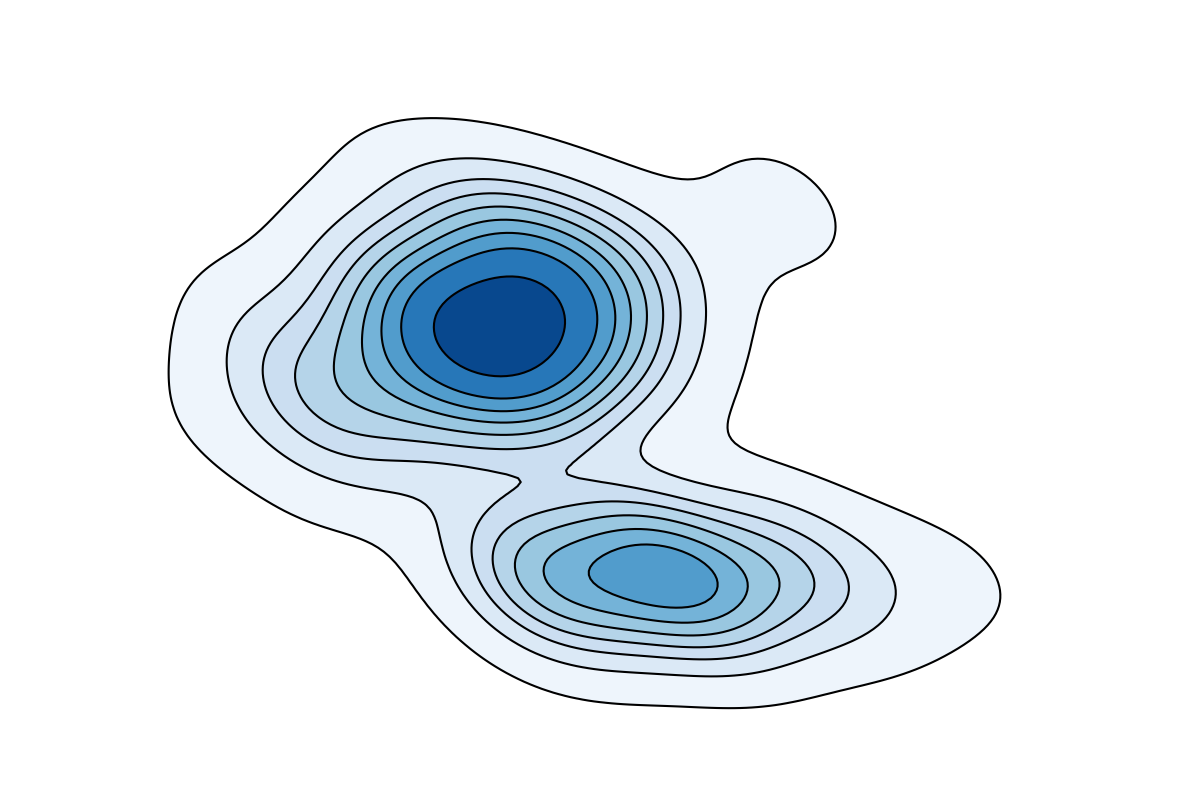

In [40]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
 
fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(15, 10))  # Set the figure size to 10 inches wide and 6 inches high
fig.patch.set_alpha(0)  # Set the figure background to be transparent
ax.set_facecolor('none')  # Set the axes background to be transparent
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks([])  # Hide y-axis ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Basic 2D density plot
sns.kdeplot(x=df.sepal_width, y=df.petal_length, color='black', fill=False)
sns.kdeplot(x=df.sepal_width, y=df.petal_length, cmap="Blues", fill=True)
plt.show()


In [1]:
import math
import torch
from torch import nn    

In [36]:

class PositionalEncoding(nn.Module):
    """Transformer sinusoidal positional encoding."""

    def __init__(self, max_time_steps: int, embedding_size: int, n: int = 10000) -> None:
        """Constructs the PositionalEncoding.

        Args:
            max_time_steps (int): Number of timesteps that can be uniquely represented by encoding.
            embedding_size (int): Size of returned time embedding.
            n (int, optional): User-defined scalar. Defaults to 10000.
        """
        super().__init__()

        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        i = torch.arange(embedding_size // 2)
        k = torch.arange(max_time_steps).unsqueeze(dim=1)

        # Pre-compute the embedding vector for each possible time step.
        # Store in 2D tensor indexed by time step `t` along 0th axis, with embedding vectors along 1st axis.
        self.pos_embeddings = torch.zeros(max_time_steps, embedding_size, requires_grad=False).to(device)
        self.pos_embeddings[:, 0::2] = torch.sin(k / (n ** (2 * i / embedding_size)))
        self.pos_embeddings[:, 1::2] = torch.cos(k / (n ** (2 * i / embedding_size)))

    def forward(self, t):
        """Returns embedding encoding time step `t`.

        Args:
            t (Tensor): Time step.

        Returns:
            Tensor: Returned position embedding.
        """
        return self.pos_embeddings[t, :]

In [33]:
class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings

In [25]:
class PositionalEncoding(nn.Module):
    "Implement the PE function."
    def __init__(self, d_model, max_len=1000):
        super(PositionalEncoding, self).__init__()
        
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) *
                             -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        x = x + torch.nn.Variable(self.pe[:, :x.size(1)], 
                         requires_grad=False)
        return self.dropout(x)

In [13]:
class PositionalEmbedding(nn.Module):
    '''
    PE_(pos, 2i) = sin(pos/10000^(2i/d_model))
    PE_(pos, 2i+1) = cos(pos/10000^(2i/d_model))
    '''
    def __init__(self,
                 d_model,
                 timesteps=1000):
        super().__init__()

        self.pos_encodings = torch.zeros(timesteps, d_model)
        positions = torch.arange(timesteps).unsqueeze(-1)

        # Use log for numerical stability
        denom = torch.exp(math.log(10000) * (torch.arange(0, d_model, 2) / d_model)).unsqueeze(0) 

        self.pos_encodings[:, ::2] = torch.sin(positions/denom) # multiplication better?
        self.pos_encodings[:, 1::2] = torch.cos(positions/denom)

        self.pos_encodings.requires_grad = False

    def forward(self, x):
        return self.pos_encodings[:x.size()[1], :] # requires grad false? 

In [34]:
test2 = SinusoidalPositionEmbeddings(100)

In [35]:
test2(torch.tensor([101]))

tensor([[ 0.4520,  0.9044,  0.2343,  0.7950, -0.4761,  0.9820,  0.9587,  0.9243,
         -0.4449, -0.2422,  0.2870,  0.2072, -0.9173,  0.6074,  0.8336, -0.2570,
         -0.9614, -0.8384, -0.2817,  0.2971,  0.7092,  0.9290,  0.9990,  0.9732,
          0.8955,  0.7952,  0.6903,  0.5902,  0.4996,  0.4200,  0.3515,  0.2933,
          0.2442,  0.2030,  0.1686,  0.1399,  0.1160,  0.0962,  0.0798,  0.0661,
          0.0548,  0.0454,  0.0376,  0.0312,  0.0258,  0.0214,  0.0177,  0.0147,
          0.0122,  0.0101,  0.8920, -0.4266,  0.9722,  0.6066, -0.8794, -0.1890,
          0.2844, -0.3818, -0.8956,  0.9702, -0.9579,  0.9783, -0.3983, -0.7944,
          0.5523,  0.9664,  0.2751, -0.5451, -0.9595, -0.9548, -0.7050, -0.3702,
         -0.0450,  0.2298,  0.4451,  0.6063,  0.7236,  0.8073,  0.8663,  0.9075,
          0.9362,  0.9560,  0.9697,  0.9792,  0.9857,  0.9902,  0.9932,  0.9954,
          0.9968,  0.9978,  0.9985,  0.9990,  0.9993,  0.9995,  0.9997,  0.9998,
          0.9998,  0.9999,  

In [26]:
test = PositionalEmbedding(100)

In [32]:
tst = PositionalEncoding(100)
tst.pe[0, 101, :]

tensor([ 4.5203e-01,  8.9200e-01,  7.2763e-01, -6.8597e-01,  6.8884e-01,
         7.2492e-01,  1.0000e+00,  2.9735e-05, -9.3832e-01, -3.4576e-01,
         5.9067e-01, -8.0692e-01,  8.9715e-01, -4.4173e-01,  4.4092e-01,
        -8.9755e-01, -9.1138e-01, -4.1158e-01,  3.8536e-01,  9.2277e-01,
        -2.9500e-01, -9.5550e-01,  6.8019e-01,  7.3304e-01, -9.9689e-01,
         7.8774e-02,  2.1185e-01, -9.7730e-01,  9.8156e-01,  1.9116e-01,
         8.9364e-02,  9.9600e-01, -8.3196e-01,  5.5484e-01, -9.5427e-01,
        -2.9894e-01, -5.0164e-01, -8.6508e-01,  9.1314e-02, -9.9582e-01,
         5.6842e-01, -8.2274e-01,  8.5802e-01, -5.1361e-01,  9.8305e-01,
        -1.8334e-01,  9.9386e-01,  1.1068e-01,  9.3712e-01,  3.4901e-01,
         8.4683e-01,  5.3186e-01,  7.4470e-01,  6.6740e-01,  6.4326e-01,
         7.6565e-01,  5.4902e-01,  8.3581e-01,  4.6481e-01,  8.8541e-01,
         3.9134e-01,  9.2025e-01,  3.2824e-01,  9.4459e-01,  2.7460e-01,
         9.6156e-01,  2.2932e-01,  9.7335e-01,  1.9

In [27]:
test.pos_encodings[101, :]

tensor([ 4.5203e-01,  8.9200e-01,  7.2763e-01, -6.8597e-01,  6.8884e-01,
         7.2491e-01,  1.0000e+00,  2.9735e-05, -9.3832e-01, -3.4576e-01,
         5.9066e-01, -8.0692e-01,  8.9715e-01, -4.4173e-01,  4.4092e-01,
        -8.9755e-01, -9.1138e-01, -4.1157e-01,  3.8536e-01,  9.2277e-01,
        -2.9500e-01, -9.5550e-01,  6.8019e-01,  7.3304e-01, -9.9689e-01,
         7.8774e-02,  2.1185e-01, -9.7730e-01,  9.8156e-01,  1.9116e-01,
         8.9363e-02,  9.9600e-01, -8.3196e-01,  5.5484e-01, -9.5427e-01,
        -2.9894e-01, -5.0164e-01, -8.6508e-01,  9.1314e-02, -9.9582e-01,
         5.6842e-01, -8.2274e-01,  8.5802e-01, -5.1362e-01,  9.8305e-01,
        -1.8334e-01,  9.9386e-01,  1.1068e-01,  9.3712e-01,  3.4901e-01,
         8.4683e-01,  5.3186e-01,  7.4470e-01,  6.6740e-01,  6.4326e-01,
         7.6565e-01,  5.4902e-01,  8.3581e-01,  4.6481e-01,  8.8541e-01,
         3.9134e-01,  9.2025e-01,  3.2824e-01,  9.4459e-01,  2.7460e-01,
         9.6156e-01,  2.2932e-01,  9.7335e-01,  1.9

In [7]:
test.pos_encodings[:, :].shape

torch.Size([5000, 100])

In [8]:
[torch.tensor([t]) for t in [0, 50, 100, 150, 199]]

[tensor([0]), tensor([50]), tensor([100]), tensor([150]), tensor([199])]